In [230]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [231]:
!pip install selenium

In [232]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline
# It sets the backend of matplotlib to the 'inline' backend:
import plotly.express as px
import time # calculate time

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
from selenium import webdriver # use for automation chrome
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model

import warnings # ignores pink warnings
warnings.filterwarnings('ignore')

In [233]:
phish_data = pd.read_csv('phishing_site_urls.csv')

In [234]:
phish_data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [235]:
phish_data.tail()

,URL,Label
162522,cropperco.com/,good
162523,crosbystillsnashandyoung.com/,good
162524,cross-commerce-company.com/,good
162525,crosscare.info/,good
162526,crosscountrygolfcars.com/,good


In [236]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162527 entries, 0 to 162526
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     162521 non-null  object
 1   Label   162507 non-null  object
dtypes: object(2)
memory usage: 2.5+ MB


In [237]:
phish_data.isnull().sum()

URL       6
Label    20
dtype: int64

In [238]:
label_counts = pd.DataFrame(phish_data.Label.value_counts())

In [239]:
label_counts.head()

,count
Label,
bad,90666
good,71841


In [240]:
label_counts.columns

Index(['count'], dtype='object')

In [241]:
label_counts = phish_data.Label.value_counts()  # Get label counts
label_counts.name = "Label"  # Assign a name to the Series
fig = px.bar(label_counts, x=label_counts.index, y=label_counts)  # Use the Series directly
fig.show()


In [242]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [243]:
phish_data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [244]:
tokenizer.tokenize(phish_data.URL[0])

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [245]:
phish_data.URL = phish_data.URL.astype(str)

In [246]:
print('Getting words tokenized ...')
t0 = time.perf_counter()

# Create an empty list to store tokenized URLs
tokenized_urls = []

for url in phish_data['URL']:
    tokenized_urls.append(tokenizer.tokenize(url))

# Assign the list of tokenized URLs to a new column
phish_data['text_tokenized'] = tokenized_urls

t1 = time.perf_counter() - t0
print('Time taken', t1, 'sec')


Getting words tokenized ...
Time taken 1.8309140490000573 sec


In [247]:
phish_data.sample(5)

,URL,Label,text_tokenized
137816,globaltradeinc.yolasite.com/contact.php,bad,"[globaltradeinc, yolasite, com, contact, php]"
149497,bitsnoop.com/melissa-auf-der-maur-q1478790.html,good,"[bitsnoop, com, melissa, auf, der, maur, q, html]"
48239,www.angelfire.com/mo3/ameritractor/,good,"[www, angelfire, com, mo, ameritractor]"
90579,chesstournamentservices.com/cca/world-open/,good,"[chesstournamentservices, com, cca, world, open]"
154574,ca.linkedin.com/in/snookerdavis,good,"[ca, linkedin, com, in, snookerdavis]"


In [248]:
stemmer = SnowballStemmer("english")

In [249]:
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 17.347143376999156 sec


In [250]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed
88051,www.svet-soft.com/capture.shtml,good,"[www, svet, soft, com, capture, shtml]","[www, svet, soft, com, captur, shtml]"
127785,webmail.mhcable.com/secure/www.paypal.com/webs...,bad,"[webmail, mhcable, com, secure, www, paypal, c...","[webmail, mhcabl, com, secur, www, paypal, com..."
47059,p3-lefilm.fr/max/74f2a372989f3dcc7bb874be70a9f...,bad,"[p, lefilm, fr, max, f, a, f, dcc, bb, be, a, ...","[p, lefilm, fr, max, f, a, f, dcc, bb, be, a, ..."
31187,www.naapsc.org/customer.paypal.services.active...,bad,"[www, naapsc, org, customer, paypal, services,...","[www, naapsc, org, custom, paypal, servic, act..."
56452,'www.acimit.it/Doc/Abstract\%202009.pdf',good,"[www, acimit, it, Doc, Abstract, pdf]","[www, acimit, it, doc, abstract, pdf]"


In [251]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.12742679599978146 sec


In [252]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
1105,www.battlenr.tk/cert/login.asp?ref=us.battle.n...,bad,"[www, battlenr, tk, cert, login, asp, ref, us,...","[www, battlenr, tk, cert, login, asp, ref, us,...",www battlenr tk cert login asp ref us battl ne...
93191,tribbles2000.tripod.com/essex.htm,good,"[tribbles, tripod, com, essex, htm]","[tribbl, tripod, com, essex, htm]",tribbl tripod com essex htm
139965,academic.research.microsoft.com/Paper/5807839,good,"[academic, research, microsoft, com, Paper]","[academ, research, microsoft, com, paper]",academ research microsoft com paper
111390,vwdcqinc.org.au/mbuwa/ali/index.php,bad,"[vwdcqinc, org, au, mbuwa, ali, index, php]","[vwdcqinc, org, au, mbuwa, ali, index, php]",vwdcqinc org au mbuwa ali index php
65040,www.phaster.com/find_info_deja.html,good,"[www, phaster, com, find, info, deja, html]","[www, phaster, com, find, info, deja, html]",www phaster com find info deja html


In [253]:
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [254]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [255]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
5,portal.acm.org/citation.cfm?doid=154766.155381,good,"[portal, acm, org, citation, cfm, doid]","[portal, acm, org, citat, cfm, doid]",portal acm org citat cfm doid
6,www.csse.monash.edu.au/~lloyd/tildeProgLang/Al...,good,"[www, csse, monash, edu, au, lloyd, tildeProgL...","[www, csse, monash, edu, au, lloyd, tildeprogl...",www csse monash edu au lloyd tildeproglang algol
7,research.microsoft.com/users/GBell/Computer_En...,good,"[research, microsoft, com, users, GBell, Compu...","[research, microsoft, com, user, gbell, comput...",research microsoft com user gbell comput engin...
8,homepages.nyu.edu/~at570/compiler.html,good,"[homepages, nyu, edu, at, compiler, html]","[homepag, nyu, edu, at, compil, html]",homepag nyu edu at compil html
9,wwwmathlabo.univ-poitiers.fr/~maavl/myprojects...,good,"[wwwmathlabo, univ, poitiers, fr, maavl, mypro...","[wwwmathlabo, univ, poitier, fr, maavl, myproj...",wwwmathlabo univ poitier fr maavl myproject html


In [256]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0),
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size,
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)

    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green',
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()
d = '../input/masks/masks-wordclouds/'

In [257]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

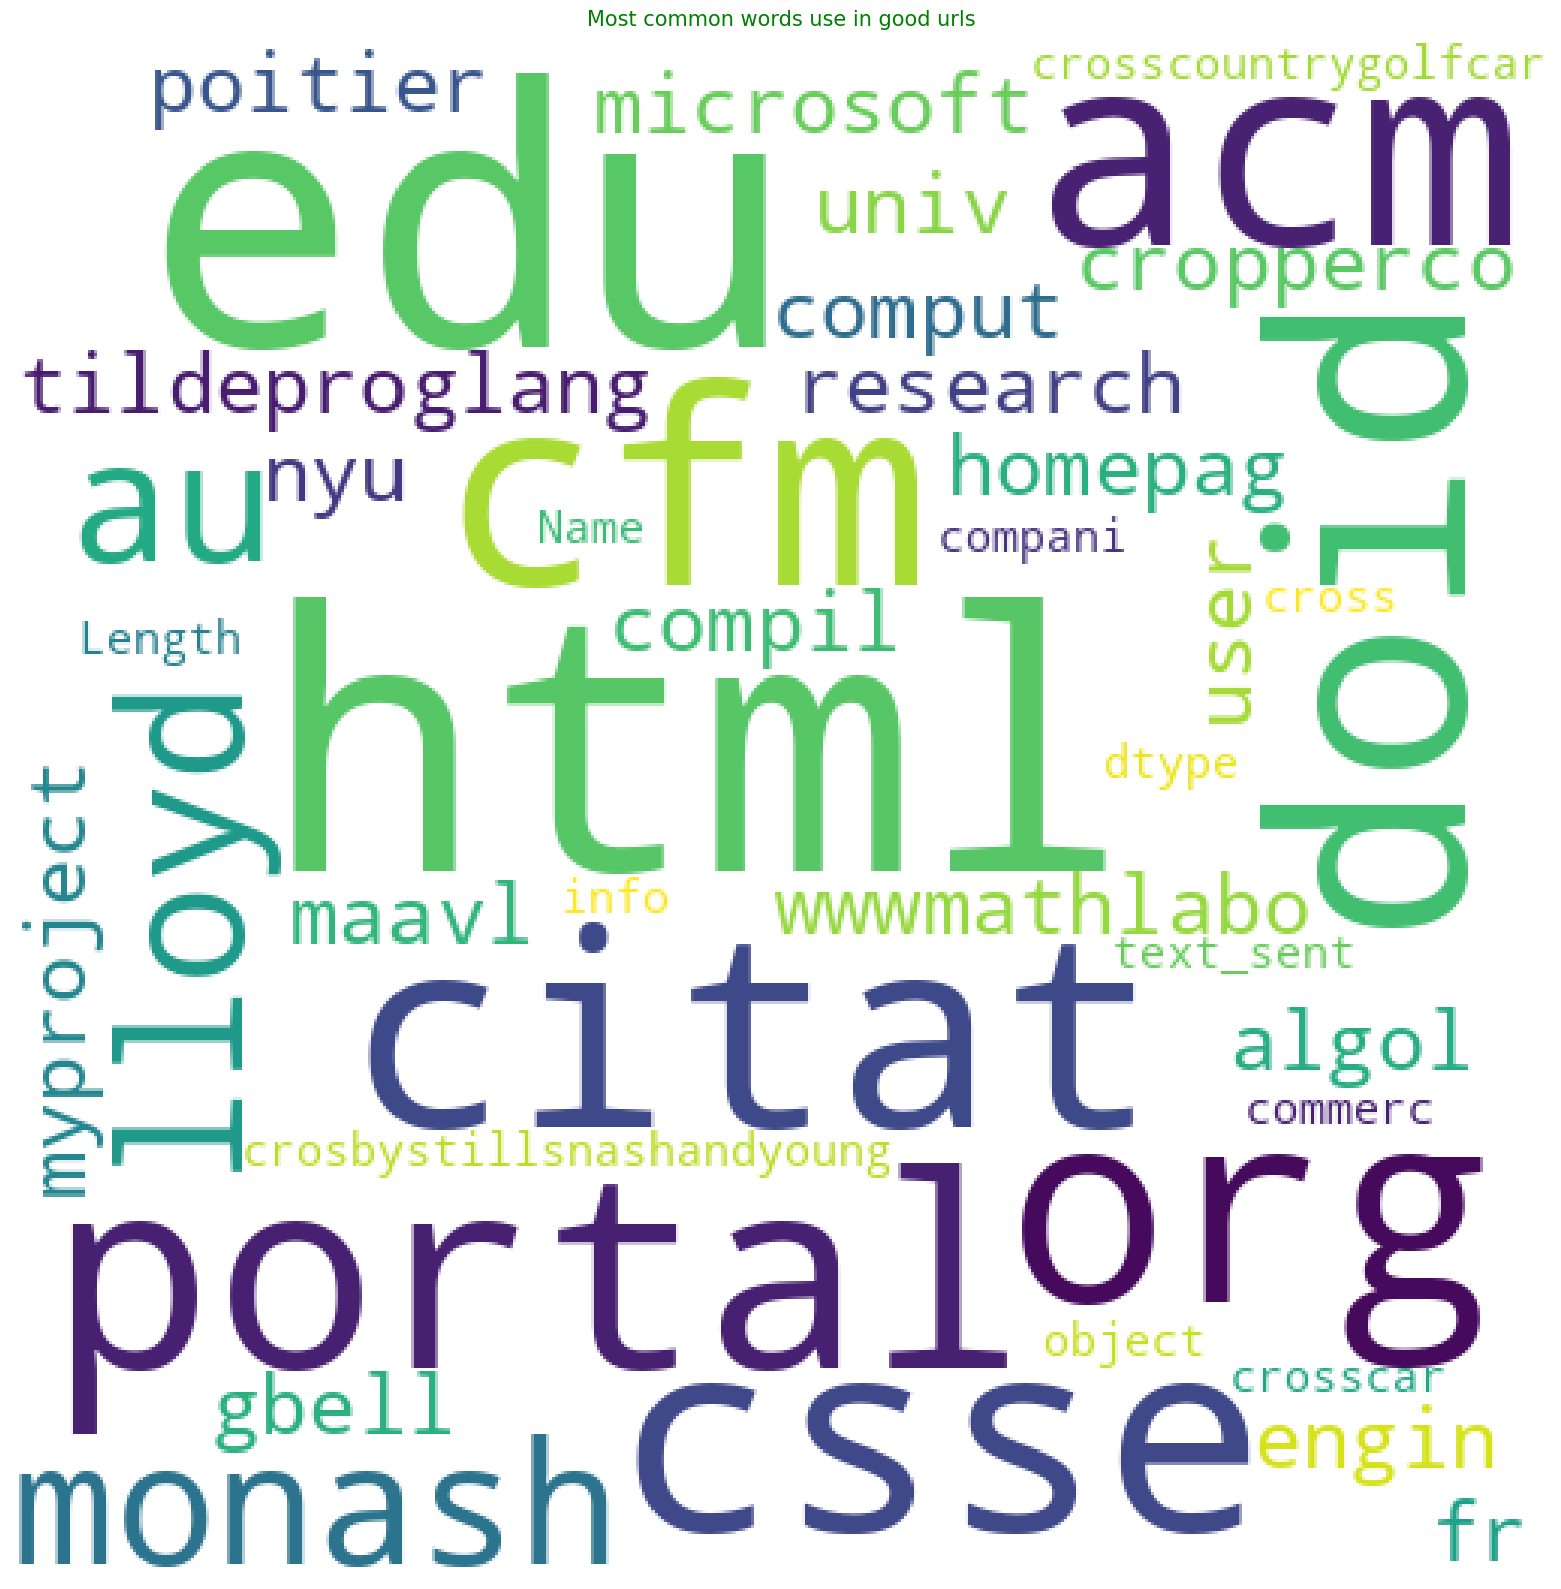

In [258]:
common_text = str(data)
common_mask = np.array(Image.open('pic1_CLOUD.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120,
               title = 'Most common words use in good urls', title_size=15)

In [259]:
data = bad_sites.text_sent
data.reset_index(drop=True, inplace=True)

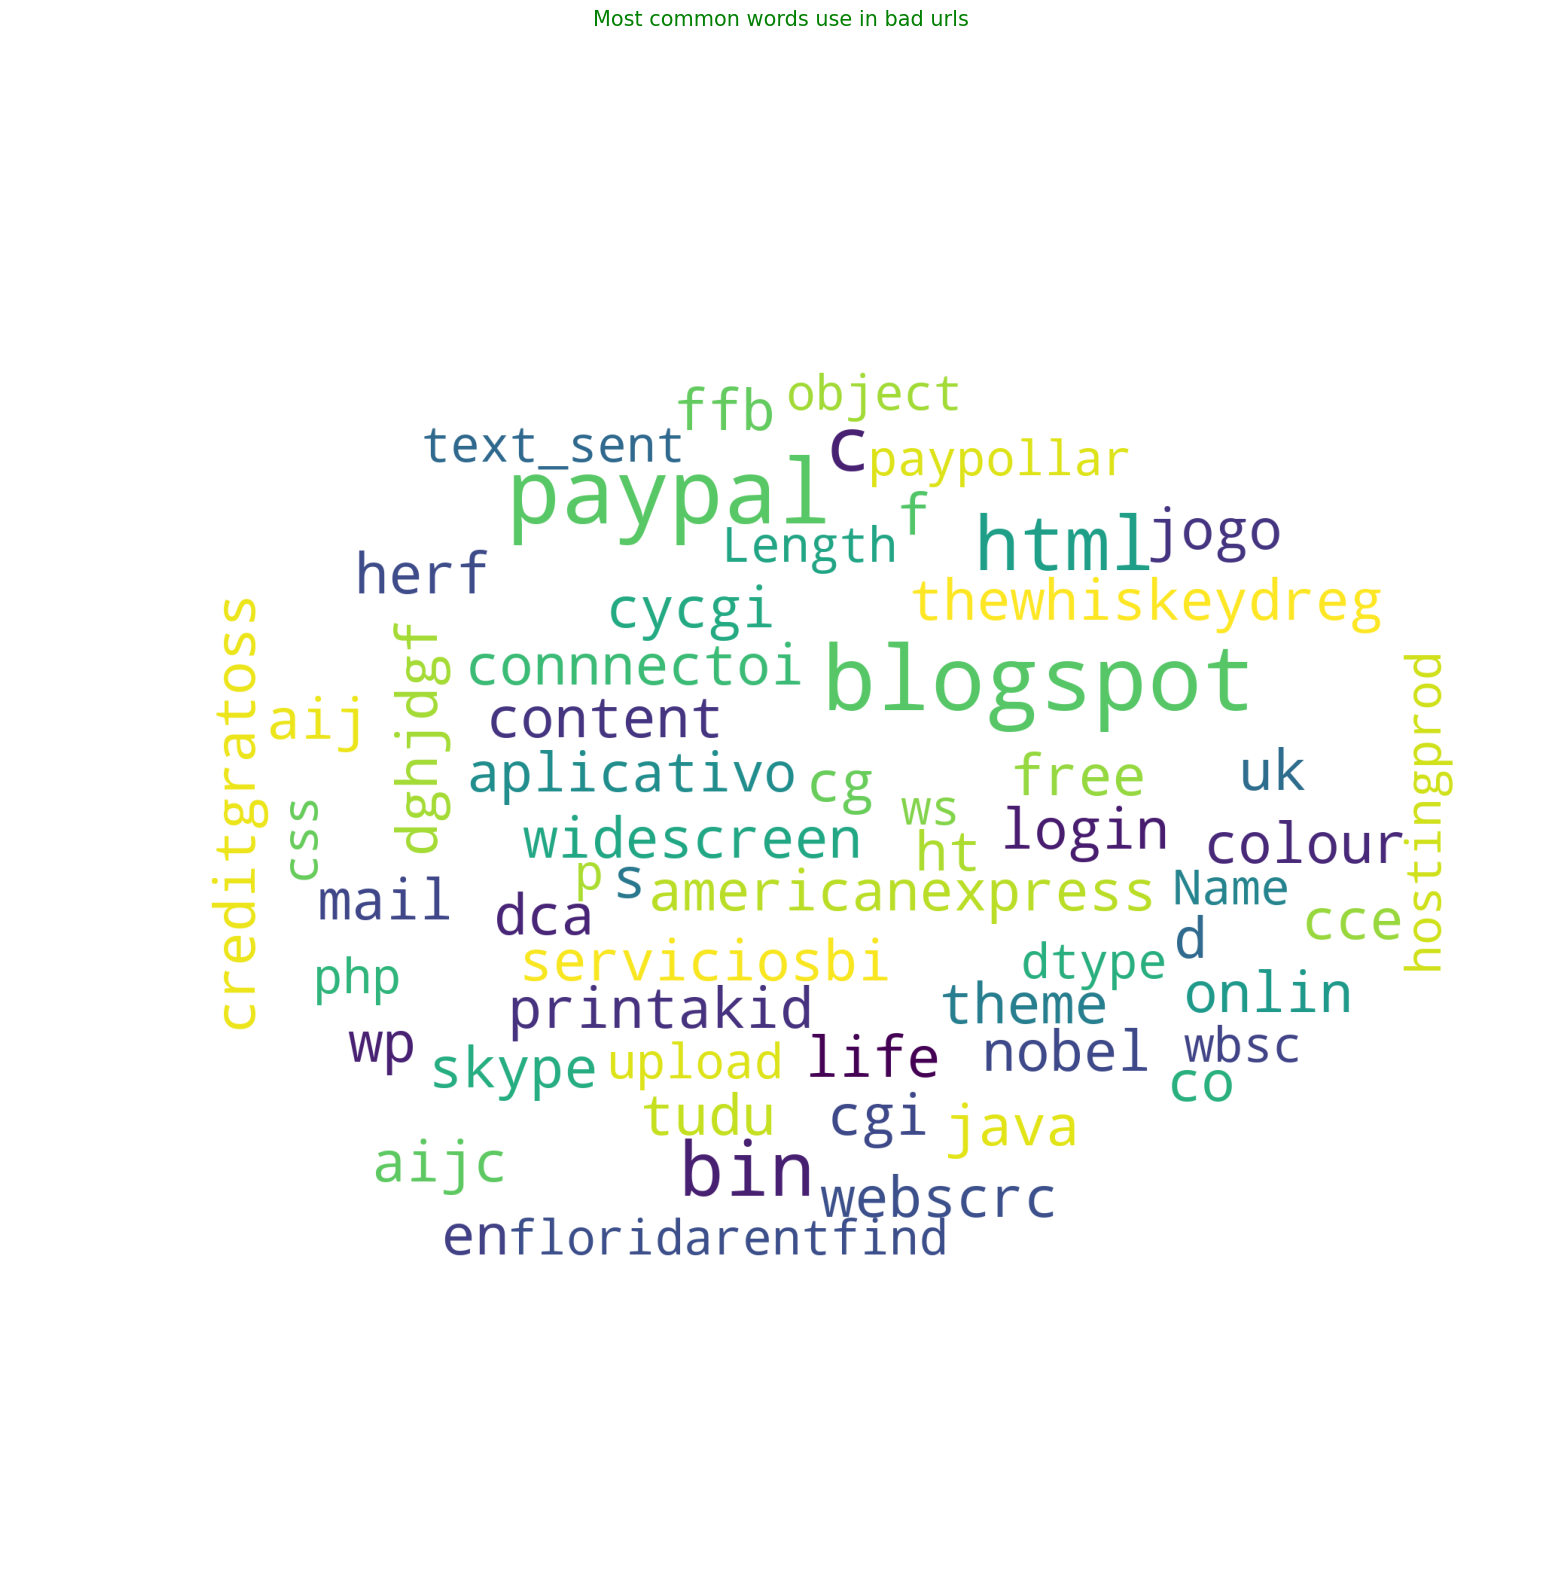

In [260]:
common_text = str(data)
common_mask = np.array(Image.open('pic2_comment.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120,
               title = 'Most common words use in bad urls', title_size=15)

In [261]:
cv = CountVectorizer()

In [262]:
help(CountVectorizer())

Help on CountVectorizer in module sklearn.feature_extraction.text object:

class CountVectorizer(_VectorizerMixin, sklearn.base.BaseEstimator)
 |  CountVectorizer(*, input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)
 |  
 |  Convert a collection of text documents to a matrix of token counts.
 |  
 |  This implementation produces a sparse representation of the counts using
 |  scipy.sparse.csr_matrix.
 |  
 |  If you do not provide an a-priori dictionary and you do not use an analyzer
 |  that does some kind of feature selection then the number of features will
 |  be equal to the vocabulary size found by analyzing the data.
 |  
 |  Read more in the :ref:`User Guide <text_feature_extraction>`.
 |  
 |  Parameters
 |  ----

In [263]:
# Assuming your data is in a variable called 'data' (text content)

from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer to the data to learn vocabulary
vectorizer.fit(data)

# Transform the data into feature vectors
features = vectorizer.transform(data)




In [264]:
# Access the first 5 rows of features (assuming features is a NumPy array)
features_to_display = features[:10].toarray()
# Now you can use features_to_display for further analysis

In [265]:
features[:10].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [266]:
features_to_display.shape

(10, 106956)

In [267]:
phish_data.Label.shape

(162527,)

In [268]:
trainX, testX, trainY, testY = train_test_split(features_to_display, phish_data.Label[:10])

In [269]:
lr = LogisticRegression()

In [270]:
print(trainY.value_counts())

Label
bad     5
good    2
Name: count, dtype: int64


In [271]:
lr.fit(trainX,trainY)

LogisticRegression()

In [272]:
lr.score(testX,testY)

0.0

In [273]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 1.0
Testing Accuracy : 0.0

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00       3.0
        Good       0.00      0.00      0.00       0.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0


CONFUSION MATRIX


<Axes: >

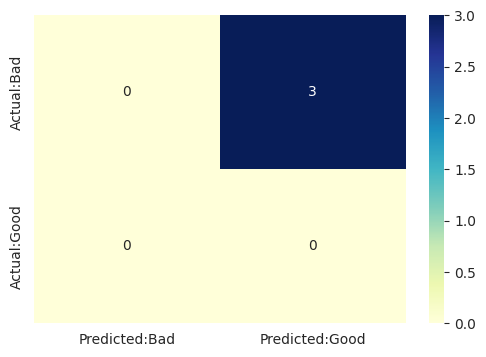

In [274]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [275]:
mnb = MultinomialNB()

In [276]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [277]:
mnb.score(testX,testY)

0.0

In [278]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 1.0
Testing Accuracy : 0.0

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00       3.0
        Good       0.00      0.00      0.00       0.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0


CONFUSION MATRIX


<Axes: >

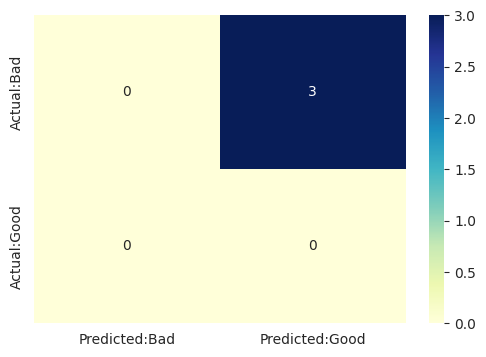

In [279]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

<Axes: xlabel='None', ylabel='Accuracy'>

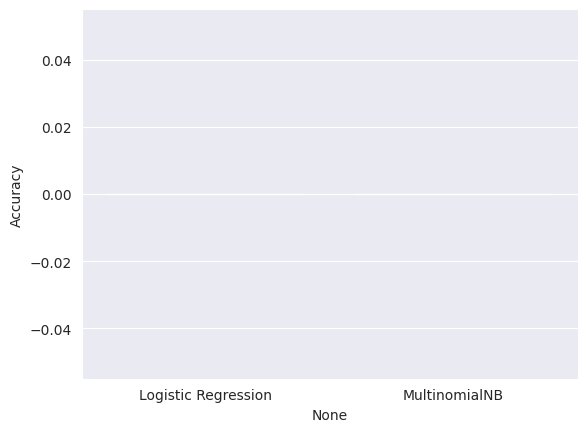

In [280]:
acc = pd.DataFrame.from_dict(Scores_ml,orient = 'index',columns=['Accuracy'])
sns.set_style('darkgrid')
sns.barplot(x=acc.index, y=acc.Accuracy)  # Specify x and y explicitly


In [281]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())

In [282]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)

In [283]:
trainX.isnull().sum()

0

In [284]:
trainY.isnull().sum()

15

In [285]:
print(trainX)

5457      runscape-service.info/m=weblogin/loginform.php...
12912                                   yuyun1993.my3gb.com
72822     www.cambridge.org/uk/catalogue/catalogue.asp?i...
125220    landtitlesouth.com/greenk/clients/login.php?cm...
113708           23cctv.com/images/Archive/verification.php
                                ...                        
47947     rincondelaelectronica.com/admin/4757569346/793...
57194     www.iupac.org/publications/pac/2002/pdf/7403x0...
51774                              members.smetc.com/aygem/
50701               www.angelfire.com/oh5/mminvestigations/
70161               www.opera.com/products/mobile/products/
Name: URL, Length: 121895, dtype: object


In [286]:
pipeline_ls.fit(trainX[:10],trainY[:10])

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [287]:
pipeline_ls.score(testX[:10],testY[:10])

0.8

Training Accuracy : 1.0
Testing Accuracy : 0.8

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       1.00      0.80      0.89        10
        Good       0.00      0.00      0.00         0

    accuracy                           0.80        10
   macro avg       0.50      0.40      0.44        10
weighted avg       1.00      0.80      0.89        10


CONFUSION MATRIX


<Axes: >

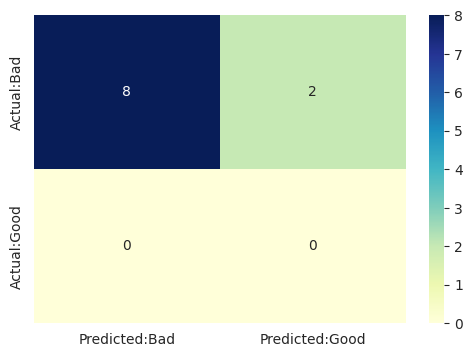

In [288]:
print('Training Accuracy :',pipeline_ls.score(trainX[:10],trainY[:10]))
print('Testing Accuracy :',pipeline_ls.score(testX[:10],testY[:10]))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX[:10]), testY[:10]),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX[:10]), testY[:10],
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [289]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [291]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX[:10],testY[:10])
print(result)

0.8


In [292]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

['bad' 'bad' 'bad' 'bad']
******************************
['bad' 'bad' 'bad' 'bad']
